<a href="https://colab.research.google.com/github/TrayambakShrivastava/Finance/blob/main/lmv2_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install torchvision tesseract
# Install Tesseract OCR
!apt-get install tesseract-ocr
# Install PyTesseract and Pillow
!pip install pytesseract Pillow
!pip install transformers
# Restart the Colab runtime
import os
# os.kill(os.getpid(), 9)


  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-l355mr1m
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-l355mr1m
  Resolved https://github.com/facebookresearch/detectron2.git to commit 3ff5dd1cff4417af07097064813c9f28d7461d3c
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=5740703 sha256=3123e034e4e900d930da8ae972871

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=3d9da9e06af57c49320ee508e813f8f6b91c3135523791bee2b52d071db95257
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 32 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http:/

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()


''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from transformers import LayoutLMv2ImageProcessor, LayoutLMv2TokenizerFast, LayoutLMv2Processor

image_processor = LayoutLMv2ImageProcessor()  # apply_ocr is set to True by default
tokenizer = LayoutLMv2TokenizerFast.from_pretrained("microsoft/layoutlmv2-base-uncased")
processor = LayoutLMv2Processor(image_processor, tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

In [ ]:
from PIL import Image

# **PROCESSOR TESTING ON A RANDOM IMAGE**

In [ ]:
# img_path ='/content/drive/MyDrive/test_invite.jpeg'

In [ ]:
# img = Image.open(img_path)

In [ ]:
# img

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# img_encoding = image_processor(images = img)
# img_encoding.keys()


# # Display the image
# #plt.imshow(img_encoding['pixel_values'][0][0].transpose())
# #plt.imshow(img_encoding['pixel_values'][0][1].transpose())
# #plt.imshow(img_encoding['pixel_values'][0][2].transpose())
# plt.imshow(img_encoding['pixel_values'][0].transpose())
# plt.show()


In [ ]:
#writing the words understood by ocr
# img_encoding['words']

# **RETRIEVING CUSTOM DATASET**

In [ ]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

In [ ]:
# from zipfile import ZipFile
# file_name = '/content/dataset.zip'

# with ZipFile(file_name, 'r') as zip:
#   zip.extractall()
#   print('Done')

In [ ]:
dataset_path = "/content/drive/MyDrive/dataset"

In [ ]:

def count_exp(path):
    c = {}
    for expression in os.listdir(path):
        class_path = os.path.join(path, expression)

        # Check if it's a directory before trying to list its contents
        if os.path.isdir(class_path):
            c[expression] = len(os.listdir(class_path))

    df = pd.DataFrame(c, index=["count"])
    return df


In [ ]:
import os

def delete_dsstore_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file == ".DS_Store":
                file_path = os.path.join(root, file)
                os.remove(file_path)
                print(f"Deleted: {file_path}")

# Replace 'your_directory_path' with the actual path to your directory
your_directory_path = dataset_path

delete_dsstore_files(your_directory_path)


In [ ]:
count = count_exp(dataset_path)
print(count)

       government  legal  medical  finance  news  educational  \
count          70     68       18       75    28           20   

       scientific research  business  technical manuals  creative writing  
count                   55        16                 23                22  


<Axes: >

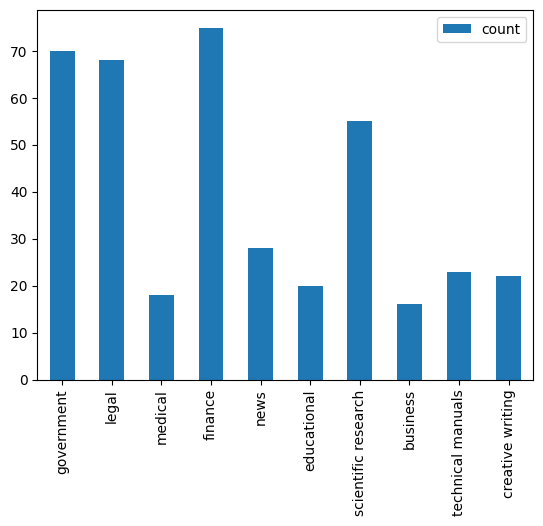

In [ ]:
count.transpose().plot(kind='bar')

In [ ]:
# Get a list of label names from the directories in dataset_path
label_names = [label for label in os.listdir(dataset_path)]

# Create a dictionary mapping numerical identifiers to label names
id_to_label = {index: label for index, label in enumerate(label_names)}

# Create a dictionary mapping label names to numerical identifiers
label_to_id = {label: index for index, label in enumerate(label_names)}

# Remove the entry associated with '.DS_Store' from label_to_id
label_to_id.pop('.DS_Store', None)

# Print the resulting label-to-id mapping
print(label_to_id)

{'government': 0, 'legal': 1, 'medical': 2, 'finance': 3, 'news': 4, 'educational': 5, 'scientific research': 6, 'business': 7, 'technical manuals': 8, 'creative writing': 9}


In [ ]:
import os
import pandas as pd

# Replace 'your_dataset_path' with the actual path to your dataset
your_dataset_path = dataset_path

# Initialize lists to store image paths and labels
image_paths = []
labels = []

# Walk through the dataset path
for label_folder, _, file_names in os.walk(your_dataset_path):
    if label_folder != your_dataset_path:
        # Extract the label from the folder path
        label = label_folder.split("/")[-1]

        # Construct relative image paths and append to the 'image_paths' list
        relative_image_paths = [os.path.join(your_dataset_path, label, image_file) for image_file in file_names]
        image_paths.extend(relative_image_paths)

        # Append corresponding labels to the 'labels' list
        labels.extend([label] * len(relative_image_paths))

# Create a Pandas DataFrame from the lists of image paths and labels
dataset = pd.DataFrame.from_dict({'image_path': image_paths, 'label': labels})

# Extract unique labels from the 'labels' list
unique_labels = list(set(labels))

# Display the first few rows of the DataFrame
dataset

,image_path,label
0,/content/drive/MyDrive/dataset/government/1.jpeg,government
1,/content/drive/MyDrive/dataset/government/2.jpg,government
2,/content/drive/MyDrive/dataset/government/3.jpeg,government
3,/content/drive/MyDrive/dataset/government/4.jpeg,government
4,/content/drive/MyDrive/dataset/government/6.jpeg,government
...,...,...
390,/content/drive/MyDrive/dataset/creative writin...,creative writing
391,/content/drive/MyDrive/dataset/creative writin...,creative writing
392,/content/drive/MyDrive/dataset/creative writin...,creative writing
393,/content/drive/MyDrive/dataset/creative writin...,creative writing


In [ ]:
dataset.shape

(395, 2)

In [ ]:
# def is_image_corrupt(file_path):
#     try:
#         # Attempt to open the image
#         img = Image.open(file_path)
#         # Check if the image can be loaded successfully
#         img.verify()
#         return False  # Image is not corrupt
#     except (IOError, SyntaxError):
#         return True  # Image is corrupt

# def find_corrupt_images(directory):
#     corrupt_images = []
#     for root, dirs, files in os.walk(directory):
#         for file in files:
#             file_path = os.path.join(root, file)
#             if is_image_corrupt(file_path):
#                 corrupt_images.append(file_path)
#     return corrupt_images

# # Replace 'your_directory_path' with the actual path to your image directory
# your_directory_path = dataset_path

# corrupt_images_list = find_corrupt_images(your_directory_path)

# if corrupt_images_list:
#     print("Corrupt images found:")
#     for corrupt_image in corrupt_images_list:
#         print(corrupt_image)
# else:
#     print("No corrupt images found.")


In [ ]:
# def delete_corrupt_images(corrupt_images):
#     for corrupt_image in corrupt_images:
#         try:
#             # Attempt to remove the corrupt image file
#             os.remove(corrupt_image)
#             print(f"Deleted: {corrupt_image}")
#         except Exception as e:
#             print(f"Error deleting {corrupt_image}: {e}")

In [ ]:
# delete_corrupt_images(corrupt_images_list)

# REDECLARING DATASET AFTER REMOVING CORRUPTED IMAGE FILES


In [ ]:
# Replace 'your_dataset_path' with the actual path to your dataset
your_dataset_path = dataset_path

# Initialize lists to store image paths and labels
image_paths = []
labels = []

# Walk through the dataset path
for label_folder, _, file_names in os.walk(your_dataset_path):
    if label_folder != your_dataset_path:
        # Extract the label from the folder path
        label = label_folder.split("/")[-1]

        # Construct relative image paths and append to the 'image_paths' list
        relative_image_paths = [os.path.join(your_dataset_path, label, image_file) for image_file in file_names]
        image_paths.extend(relative_image_paths)

        # Append corresponding labels to the 'labels' list
        labels.extend([label] * len(relative_image_paths))

# Create a Pandas DataFrame from the lists of image paths and labels
dataset = pd.DataFrame.from_dict({'image_path': image_paths, 'label': labels})

# Extract unique labels from the 'labels' list
unique_labels = list(set(labels))

# Display the first few rows of the DataFrame
dataset

,image_path,label
0,/content/drive/MyDrive/dataset/government/1.jpeg,government
1,/content/drive/MyDrive/dataset/government/2.jpg,government
2,/content/drive/MyDrive/dataset/government/3.jpeg,government
3,/content/drive/MyDrive/dataset/government/4.jpeg,government
4,/content/drive/MyDrive/dataset/government/6.jpeg,government
...,...,...
390,/content/drive/MyDrive/dataset/creative writin...,creative writing
391,/content/drive/MyDrive/dataset/creative writin...,creative writing
392,/content/drive/MyDrive/dataset/creative writin...,creative writing
393,/content/drive/MyDrive/dataset/creative writin...,creative writing


In [ ]:
dataset.shape

(395, 2)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Optionally, turn off axis labels
    plt.show()

# Example usage
# image_path = 'path/to/your/image.jpg'
# show_image(image_path)


In [ ]:
import imghdr

def is_png(file_path):
    image_type = imghdr.what(file_path)
    return image_type

# Example usage
# image_path = '/content/dataset/medical/19.png'
# print(is_png(image_path))


In [ ]:
#  show_image('/content/dataset/medical/19.webp')

       government  legal  medical  finance  news  educational  \
count          70     68       18       75    28           20   

       scientific research  business  technical manuals  creative writing  
count                   55        16                 23                22  


<Axes: >

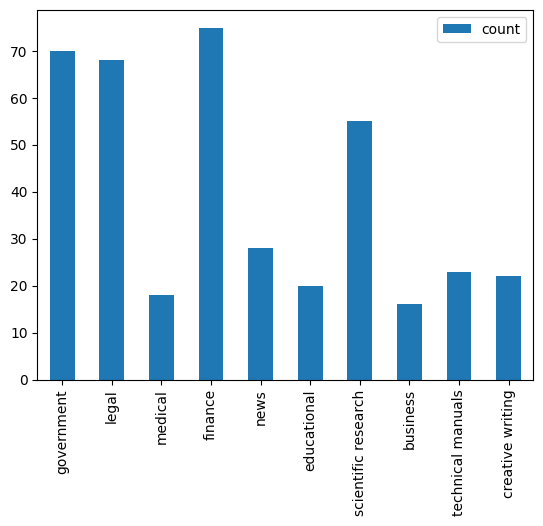

In [ ]:
count = count_exp(dataset_path)
print(count)
count.transpose().plot(kind='bar')

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into train, validation, and test sets
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

# Print the size of each split
print(f"Train set size: {len(train_data)} samples")
print(f"Validation set size: {len(val_data)} samples")
print(f"Test set size: {len(test_data)} samples")

# # Optional: Save the split datasets to CSV files
# train_data.to_csv(os.path.join(your_dataset_path, 'train.csv'), index=False)
# val_data.to_csv(os.path.join(your_dataset_path, 'validation.csv'), index=False)
# test_data.to_csv(os.path.join(your_dataset_path, 'test.csv'), index=False)


Train set size: 284 samples
Validation set size: 32 samples
Test set size: 79 samples


In [ ]:
train_data.head()

,image_path,label
148,/content/drive/MyDrive/dataset/medical/11.png,medical
295,/content/drive/MyDrive/dataset/scientific rese...,scientific research
392,/content/drive/MyDrive/dataset/creative writin...,creative writing
54,/content/drive/MyDrive/dataset/government/imag...,government
274,/content/drive/MyDrive/dataset/educational/16.png,educational


In [ ]:
!pip install datasets
from datasets import Dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00


In [ ]:
train_data_hf = Dataset.from_pandas(train_data)
test_data_hf = Dataset.from_pandas(test_data)


In [ ]:
test_data_hf

Dataset({
    features: ['image_path', 'label', '__index_level_0__'],
    num_rows: 79
})

In [ ]:
from transformers import LayoutLMv2Config, LayoutLMv2Model

In [ ]:
from datasets import Features, Array3D, Sequence, Value, Array2D, ClassLabel

In [ ]:
# feature_extractor = LayoutLMv2FeatureExtractor()
# tokenizer = LayoutLMv2Tokenizer.from_pretrained("microsoft/layoutlmv2-base-uncased")
# processor = LayoutLMv2Processor(feature_extractor, tokenizer)

input_size = 224
ch = 3


# we need to define custom features
features = Features({
    'image': Array3D(dtype="int64", shape=(ch, input_size, input_size)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'token_type_ids': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': ClassLabel(num_classes=len(unique_labels), names=unique_labels),
})

DEFINING A PREPROCESSING FUNCTION

In [ ]:
dataset_path


'/content/drive/MyDrive/dataset'

In [ ]:
#creating path to images
image_path = dataset_path

In [ ]:
def preprocess_data(examples):
    # take a batch of images
    images = [Image.open(path).convert("RGB")
              for path in examples['image_path']]
    encoded_inputs = processor(images, padding="max_length", truncation=True)

    # add labels
    encoded_inputs["labels"] = [label_to_id[label] for label in examples["label"]]

    return encoded_inputs

In [ ]:
# Encoding Training Dataset
train_encoded_data_custom = train_data_hf.map(
    preprocess_data,
    remove_columns=train_data_hf.column_names,
    features=features,  # Assuming you have a custom_features variable instead of features
    batched=True,
    batch_size=16
)

train_encoded_data_custom.set_format(type="torch")


Map:   0%|          | 0/284 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# Encoding Test Dataset
test_encoded_data_custom = test_data_hf.map(
    preprocess_data,
    remove_columns=test_data_hf.column_names,
    features=features,
    batched=True,
    batch_size=16
)

test_encoded_data_custom.set_format(type="torch")


Map:   0%|          | 0/79 [00:00<?, ? examples/s]

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_encoded_data_custom, batch_size=4, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_encoded_data_custom, batch_size=4)

In [ ]:
from transformers import LayoutLMv2ForSequenceClassification
num_labels = len(unique_labels)
model = LayoutLMv2ForSequenceClassification.from_pretrained("microsoft/layoutlmv2-base-uncased", num_labels=num_labels)


# Accessing the model configuration
configuration = model.config


pytorch_model.bin:   0%|          | 0.00/802M [00:00<?, ?B/s]

Some weights of LayoutLMv2ForSequenceClassification were not initialized from the model checkpoint at microsoft/layoutlmv2-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import AdamW
import torch
from tqdm import tqdm

In [ ]:
epochs = 5

In [ ]:
def train(model, dataloader, optimizer):
    model.train()
    pbar = tqdm(dataloader)
    correct = 0
    total_loss = 0
    progress = 0
    for batch_idx, batch in enumerate(pbar):

        optimizer.zero_grad()
        outputs = model(**batch)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        predictions = outputs.logits.argmax(-1)
        correct += (predictions == batch['labels']).float().sum()
        total_loss += loss.item()
        progress += batch["input_ids"].shape[0]

        pbar.set_description(
            desc=f'batch_id={batch_idx} loss={total_loss / (batch_idx+1):.4f} acc={100 * correct / progress:.2f} %')


def evaluate(model, dataloader):
    model.eval()
    total_loss = 0
    correct = 0
    iteration = 0
    with torch.no_grad():
        for batch in dataloader:
            # forward pass
            outputs = model(**batch)
            loss = outputs.loss

            total_loss += loss.item()
            predictions = outputs.logits.argmax(-1)
            correct += (predictions == batch['labels']).float().sum()
            iteration += 1

    accuracy = 100 * correct / len(dataloader.dataset)
    print("loss: {:.4f} \t Accuracy: {:.2f} %\n".format(
        total_loss / iteration, accuracy.item()))

In [ ]:
optimizer = AdamW(model.parameters(), lr=5e-5)
for epoch in range(epochs):
    print("Epoch: ",epoch)

    train(model, train_dataloader, optimizer)
    evaluate(model, test_dataloader)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch:  0


batch_id=69 loss=1.9250 acc=32.14 %:  99%|█████████▊| 70/71 [54:11<00:46, 46.49s/it]

In [ ]:
# Assuming 'model' is your PyTorch model
torch.save(model, 'your_model.pth')


In [ ]:
def infer(image, id2label, model, processor):
    # prepare image for the model
    encoded_inputs = processor(image, return_tensors="pt")

    # forward pass
    outputs = model(**encoded_inputs)
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).item()

    # map predicted index to label using id2label dictionary
    predicted_label = id2label[predicted_class_idx]

    return predicted_label


In [ ]:
num_test = 8
cnt = 1

plt.figure(figsize=(20,50))
while cnt<=8:
    k = np.random.randint(len(test_data))
    label = test_data.label.iloc[k]
    im = Image.open(test_data.image_path.iloc[k]).convert("RGB")
    try:
        pred = infer(im, id_to_label, model, processor)
    except Exception as e:
        continue

    plt.subplot(int(num_test/2),2,cnt)
    plt.imshow(im)
    plt.axis('off')
    plt.title(f"Label: {label}\n Pred: {pred}")
    cnt += 1

plt.show()


EDITING THE INFERENCE TO ACCEPT PAGINATED INPUT

In [ ]:
# !pip install PyMuPDF

In [ ]:
# def split_into_pages(pdf_doc_path):
#   doc = fitz.open(pdf_doc_path)
#   pages = [page for page in doc.pages()]
#   return pages

In [ ]:
# import statistics

# def inference(doc_path, id2label, model, processor):
#     pages = split_into_pages(doc_path)
#     all_pred = []

#     for page in pages:
#         encoded_inputs = processor(page, return_tensors="pt")
#         outputs = model(**encoded_inputs)
#         logits = outputs.logits
#         predicted_class_idx = logits.argmax(-1).item()
#         predicted_label = id2label[predicted_class_idx]
#         all_pred.append(predicted_label)

#     # Calculate the most common prediction (mode)
#     average_pred = statistics.mode(all_pred)

#     return average_pred


